In [17]:
import sklearn
import mat

In [18]:
import pandas as pd
df = pd.read_csv('tumor.csv')
df["diagnosis"] = [0 if i == 'B' else 1 for i in df['diagnosis']]

In [19]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [20]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [36]:
# feature와 target 분리
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = df[features] # 행렬
y = df['diagnosis'] # 벡터

In [38]:
correlation_matrix = X.corr()
print(correlation_matrix)

                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave.points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581   

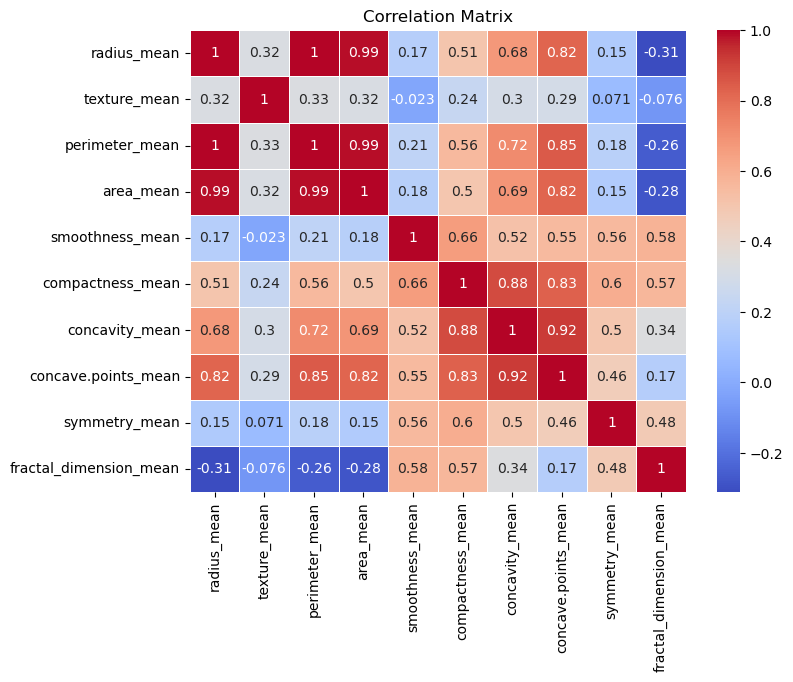

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [23]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1004) # random 값을 고정하려고

In [24]:
X_tn

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean
138,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699
286,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246
...,...,...,...,...,...,...,...,...,...,...
239,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843


In [25]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [26]:
X_tn_std

array([[ 0.25084121, -0.41476566,  0.22076583, ...,  0.99750877,
         0.56960125, -0.08456866],
       [ 1.09023194,  0.14534661,  0.92587591, ...,  0.21229021,
         1.21715016, -1.74480943],
       [ 1.2748979 ,  0.20043962,  1.24693469, ...,  0.76593672,
        -0.40925176, -0.80526092],
       ...,
       [-0.61932717, -0.1553694 , -0.54814961, ...,  0.10493206,
         1.86469907,  2.12211576],
       [-0.09610695, -0.15996049, -0.10923382, ..., -0.25785551,
        -0.34524983,  0.78946238],
       [ 1.57707856,  0.42999383,  1.56799346, ...,  2.07783259,
         0.991261  , -0.38706425]])

In [27]:
# 학습
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_tn_std, y_tn)

KNeighborsClassifier(n_neighbors=4)

In [28]:
# 예측
knn_pred = clf_knn.predict(X_te_std)
print(knn_pred)

[0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0]


In [32]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, knn_pred, average='macro')
print(recall)

0.9311708860759493


In [30]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, knn_pred)
print(conf_matrix)

[[78  1]
 [ 8 56]]


In [31]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        79
           1       0.98      0.88      0.93        64

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

